<a href="https://colab.research.google.com/github/huseyin-yigit-ulker/Machine_learning_assignments/blob/main/ass2/Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2

**Due Date:** 16.11.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------

**Student:** Hüseyin Yiğit Ülker
**Id:**21993092

**Github Classroom:** https://classroom.github.com/a/G-DSs1pj



## Part I: Theory Questions

###MLE

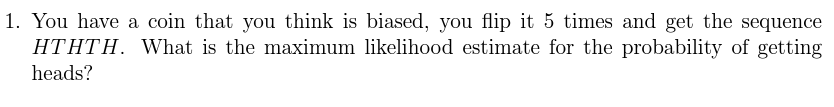

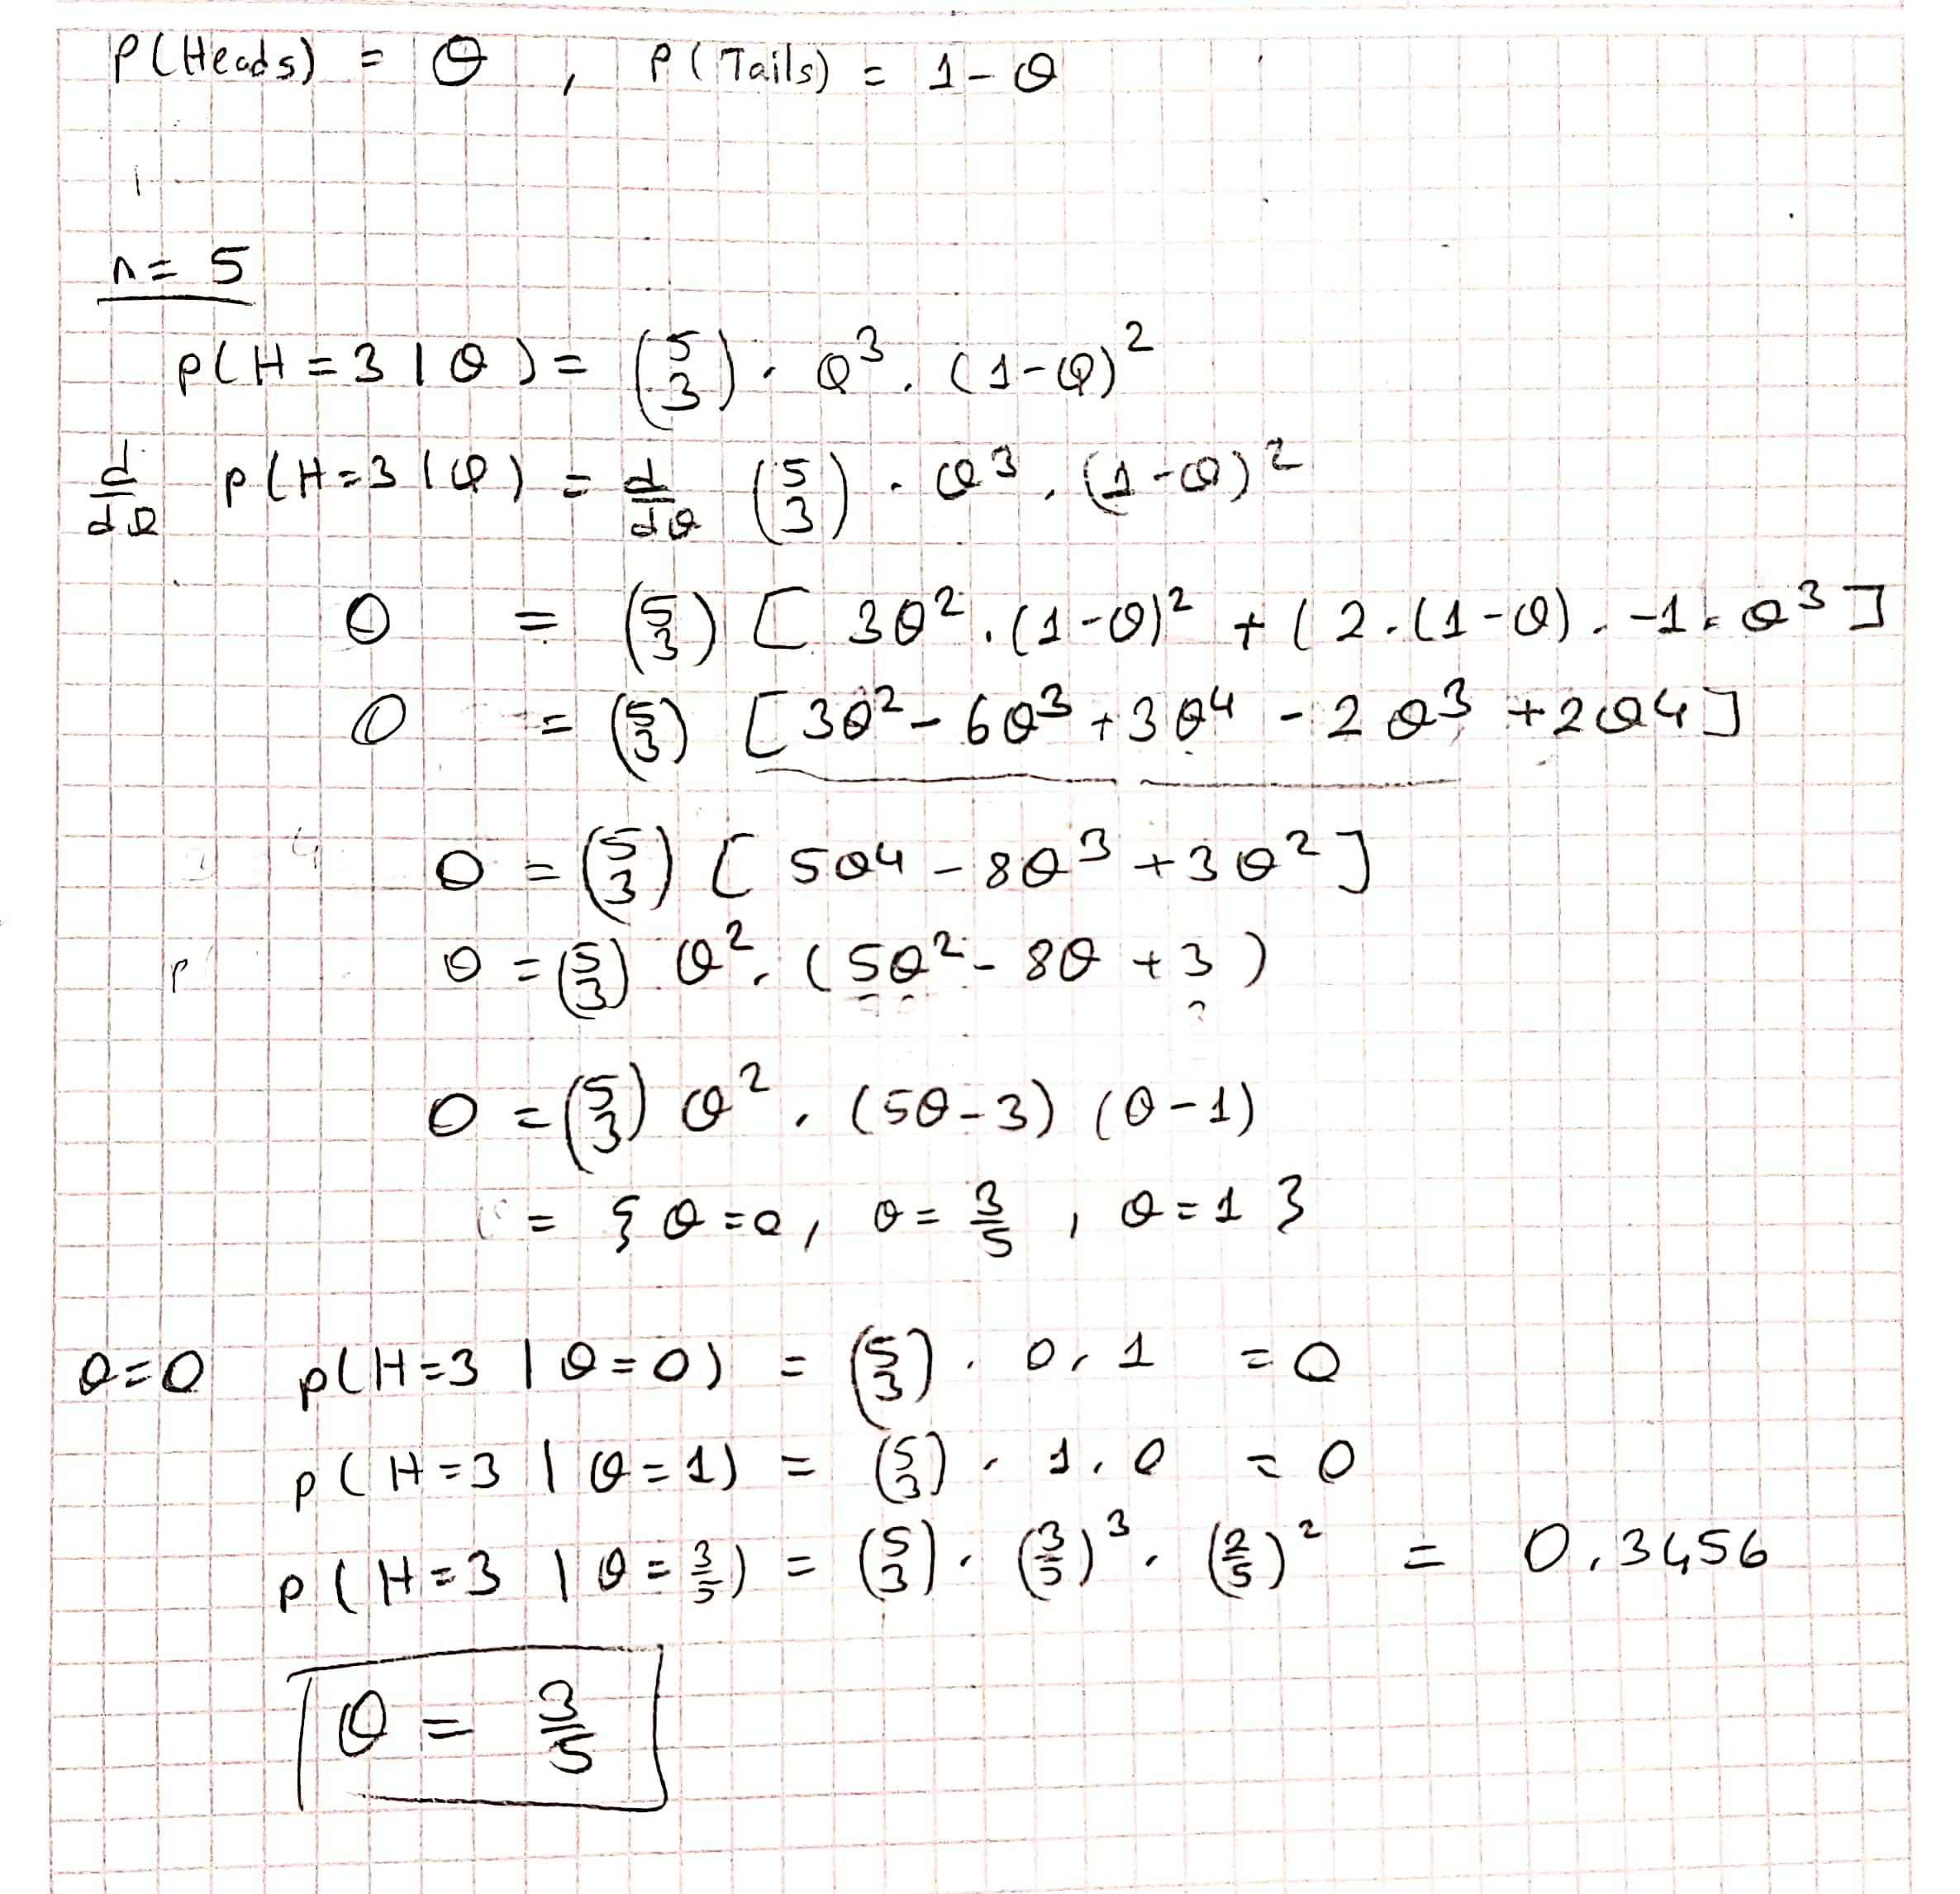

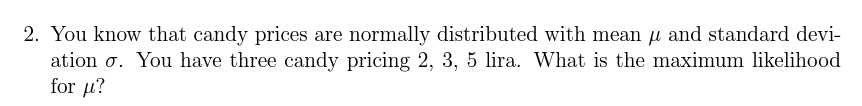

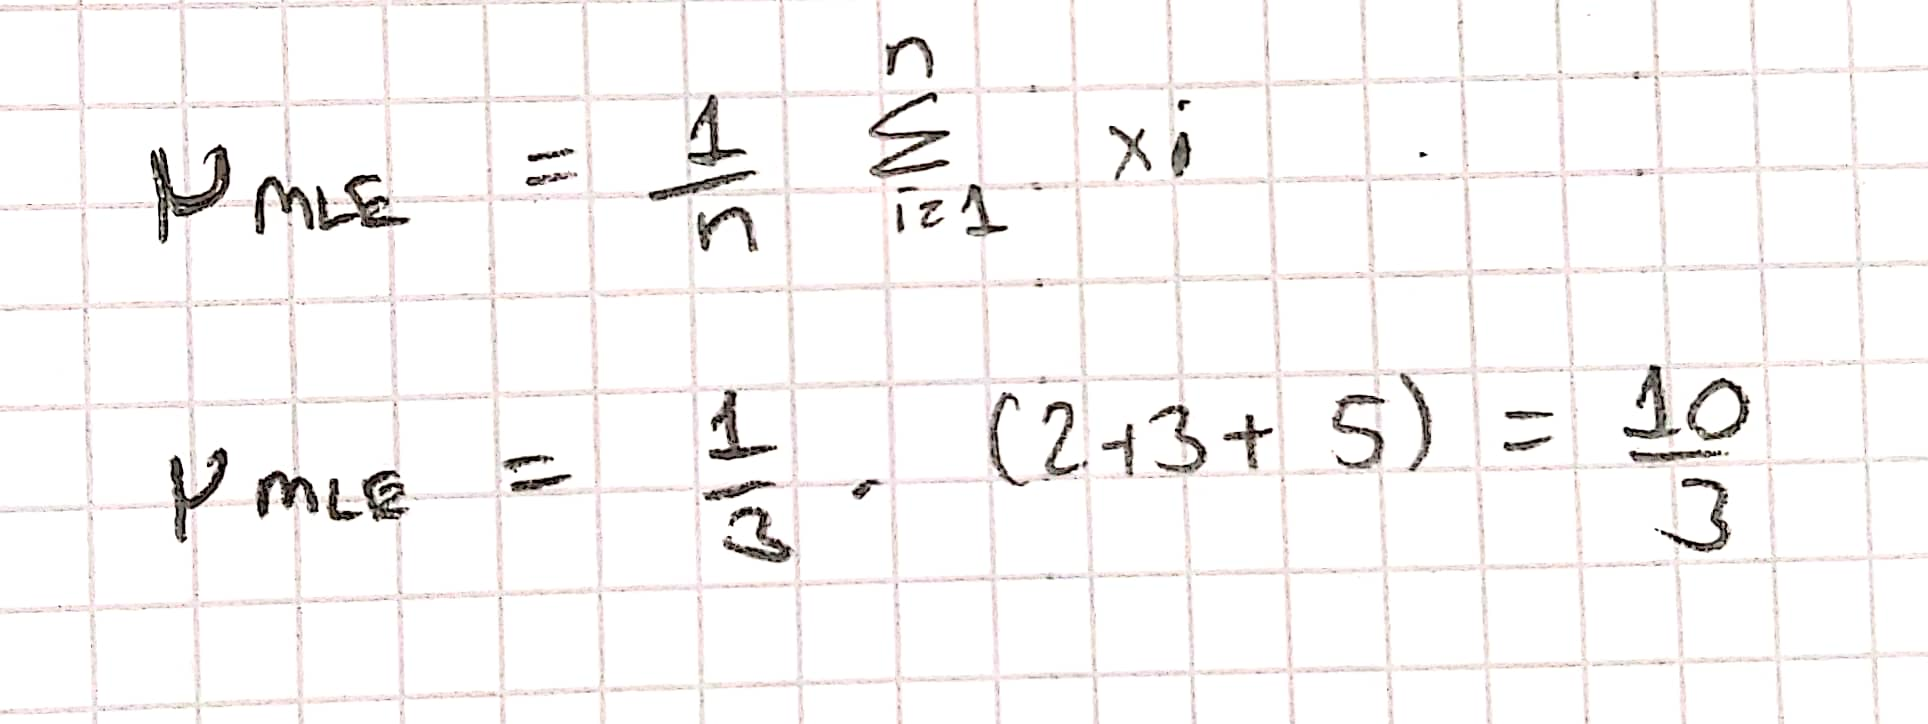

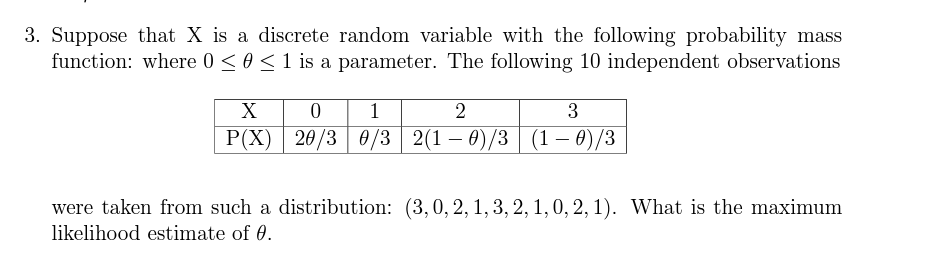

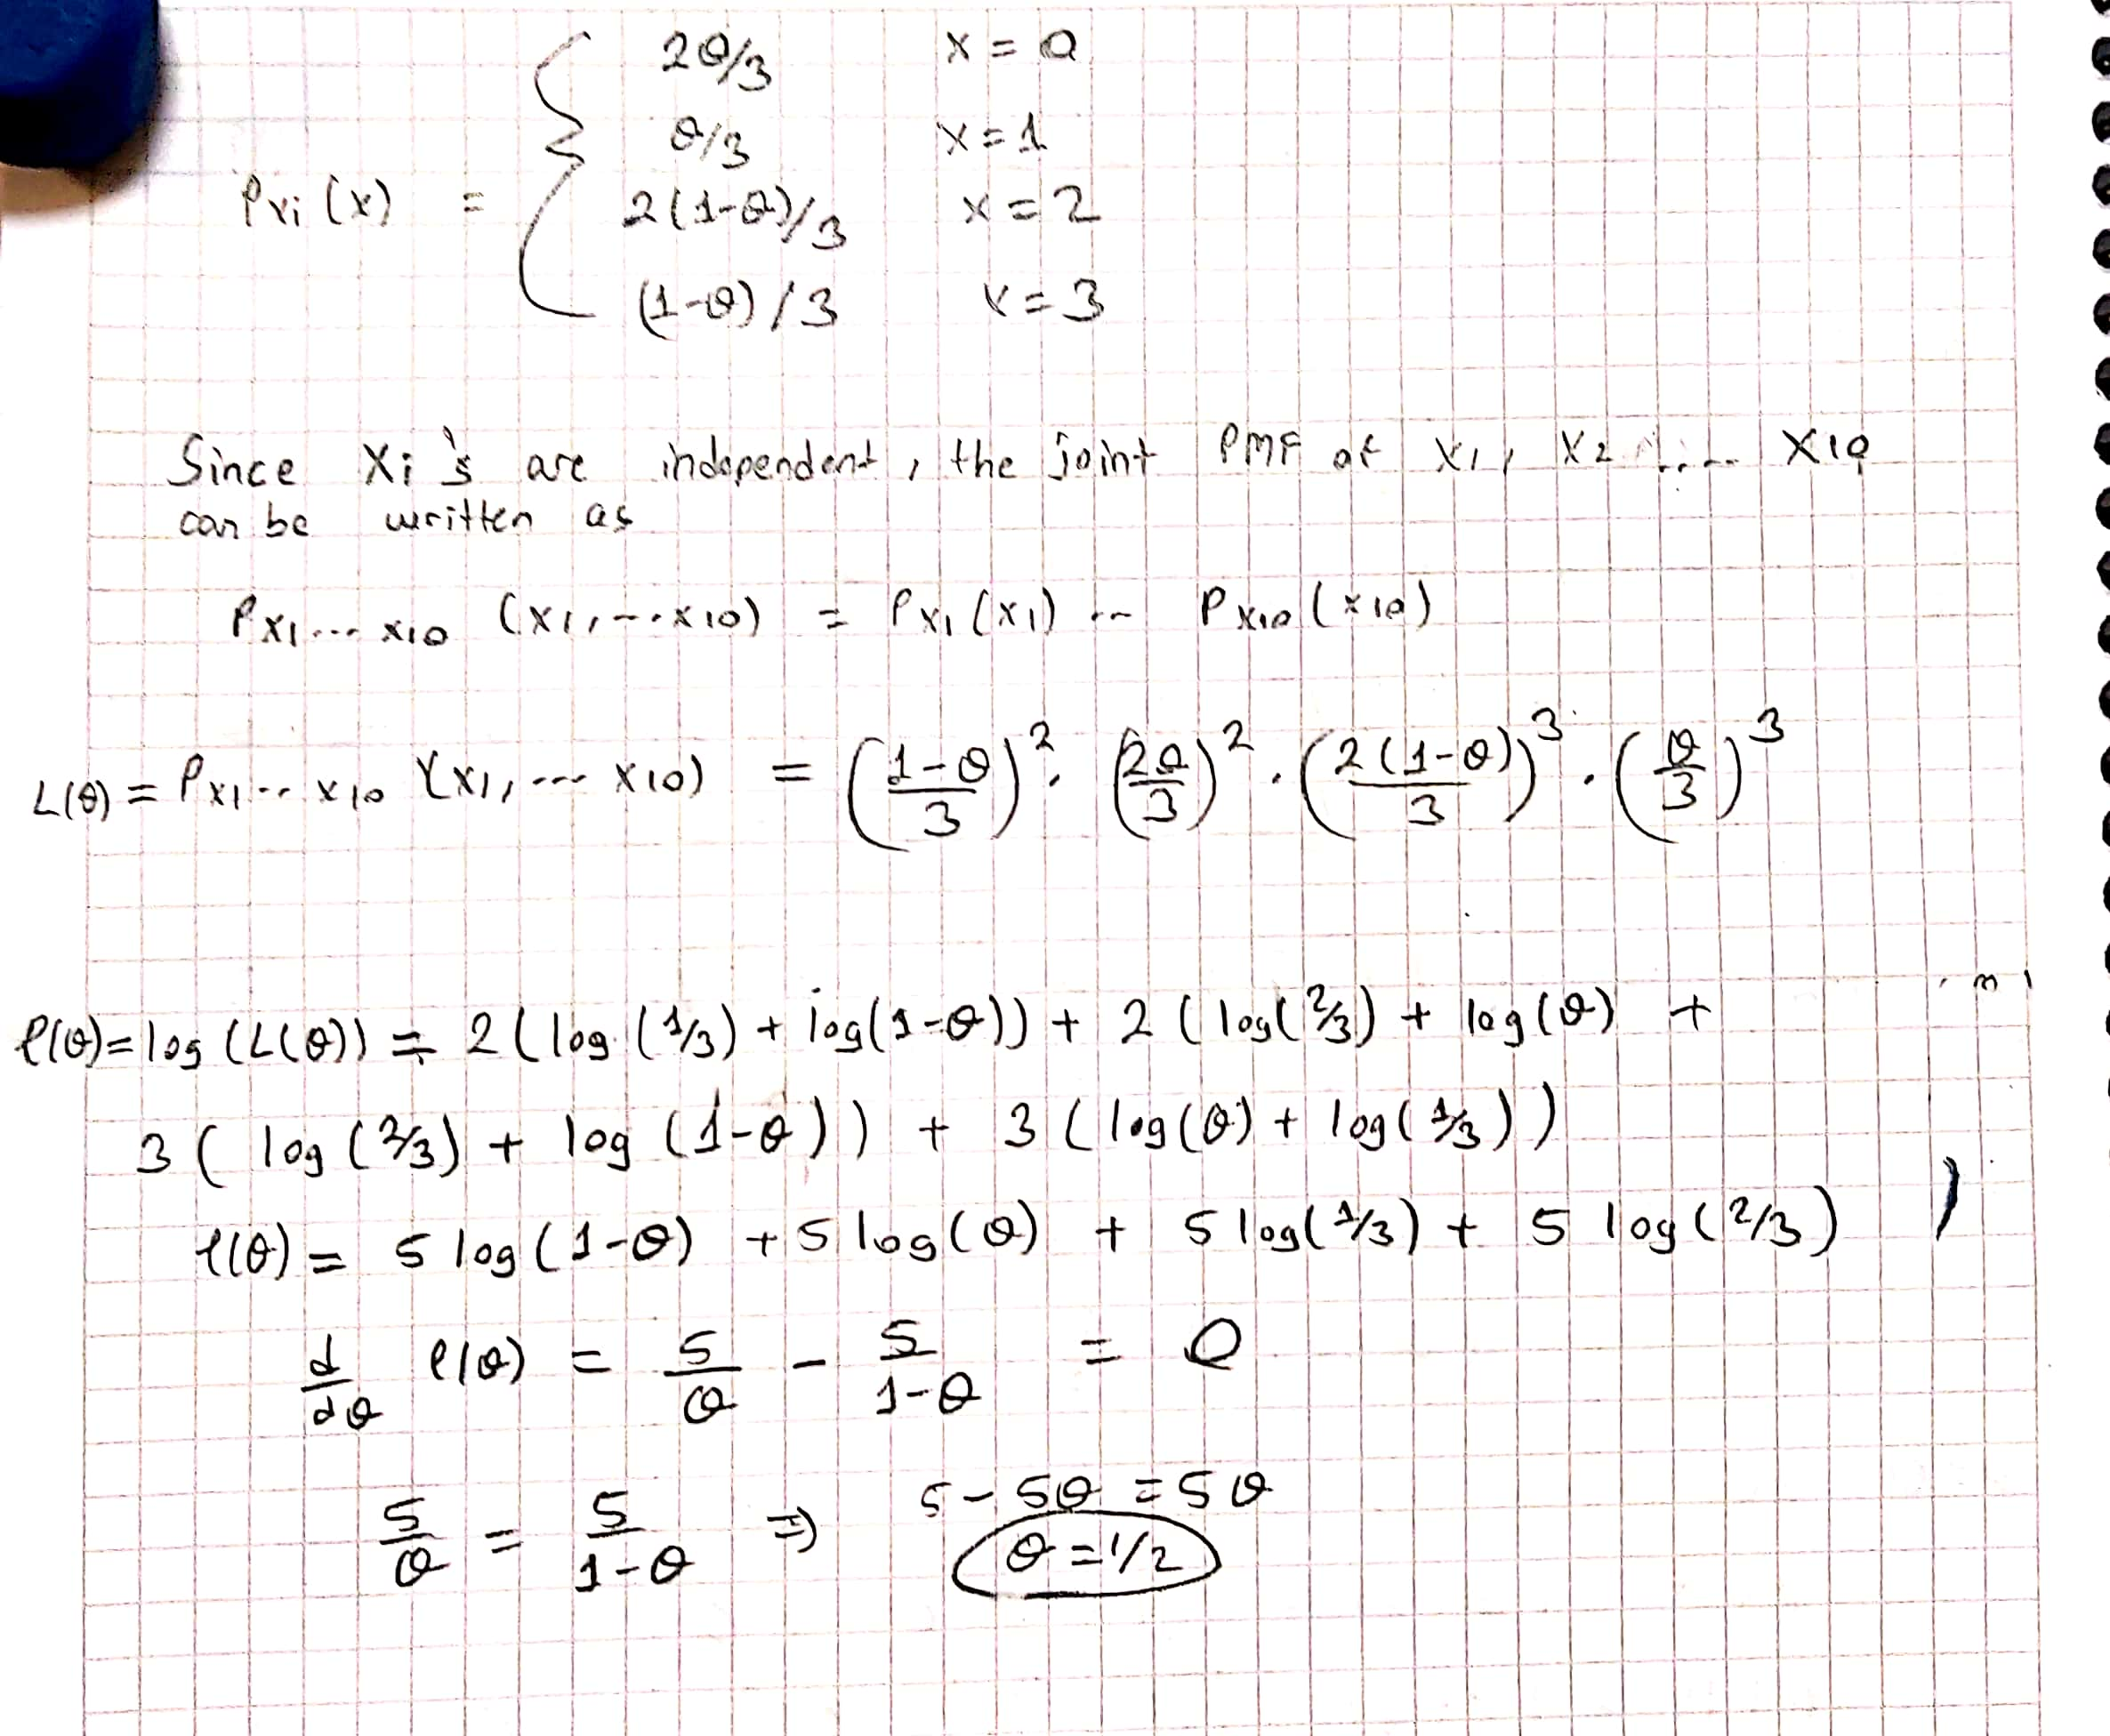

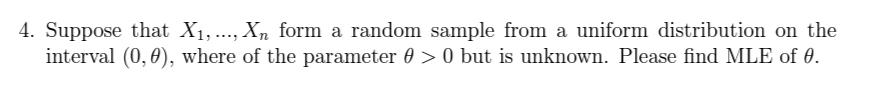

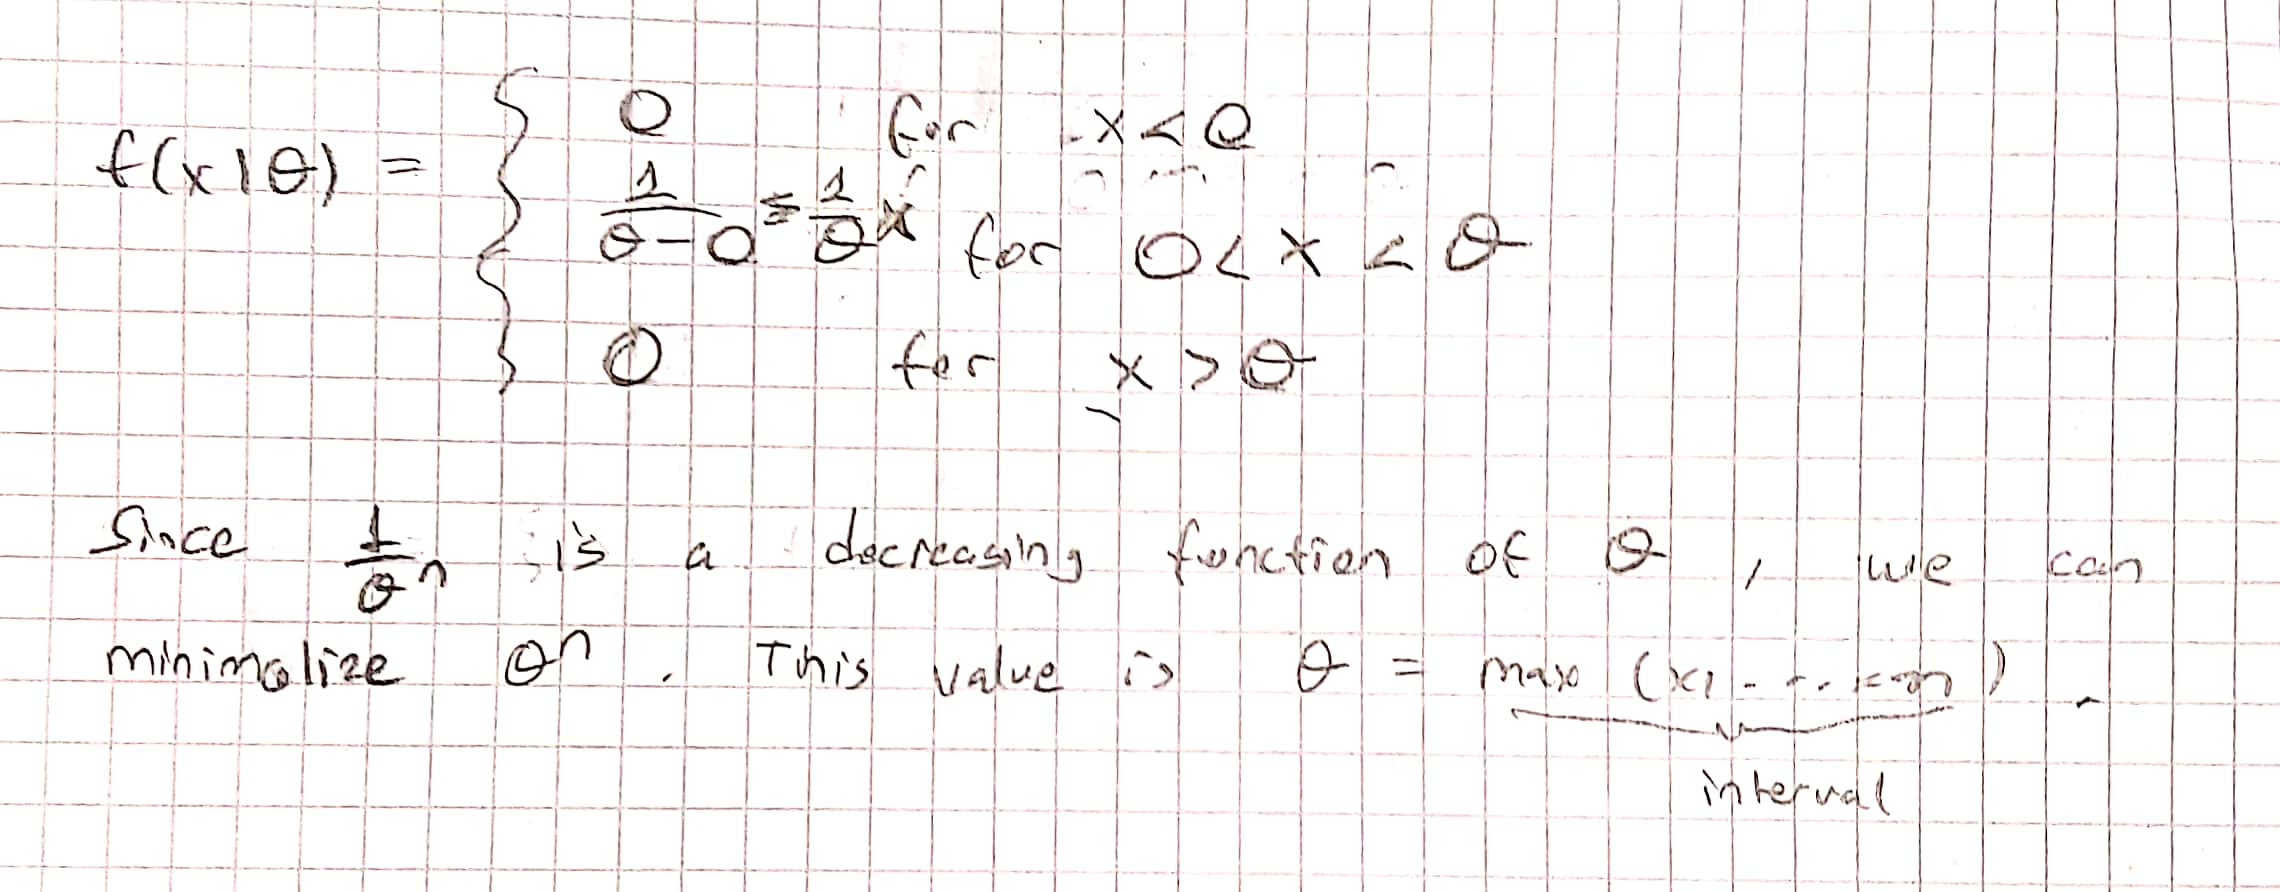

###Naive Bayes


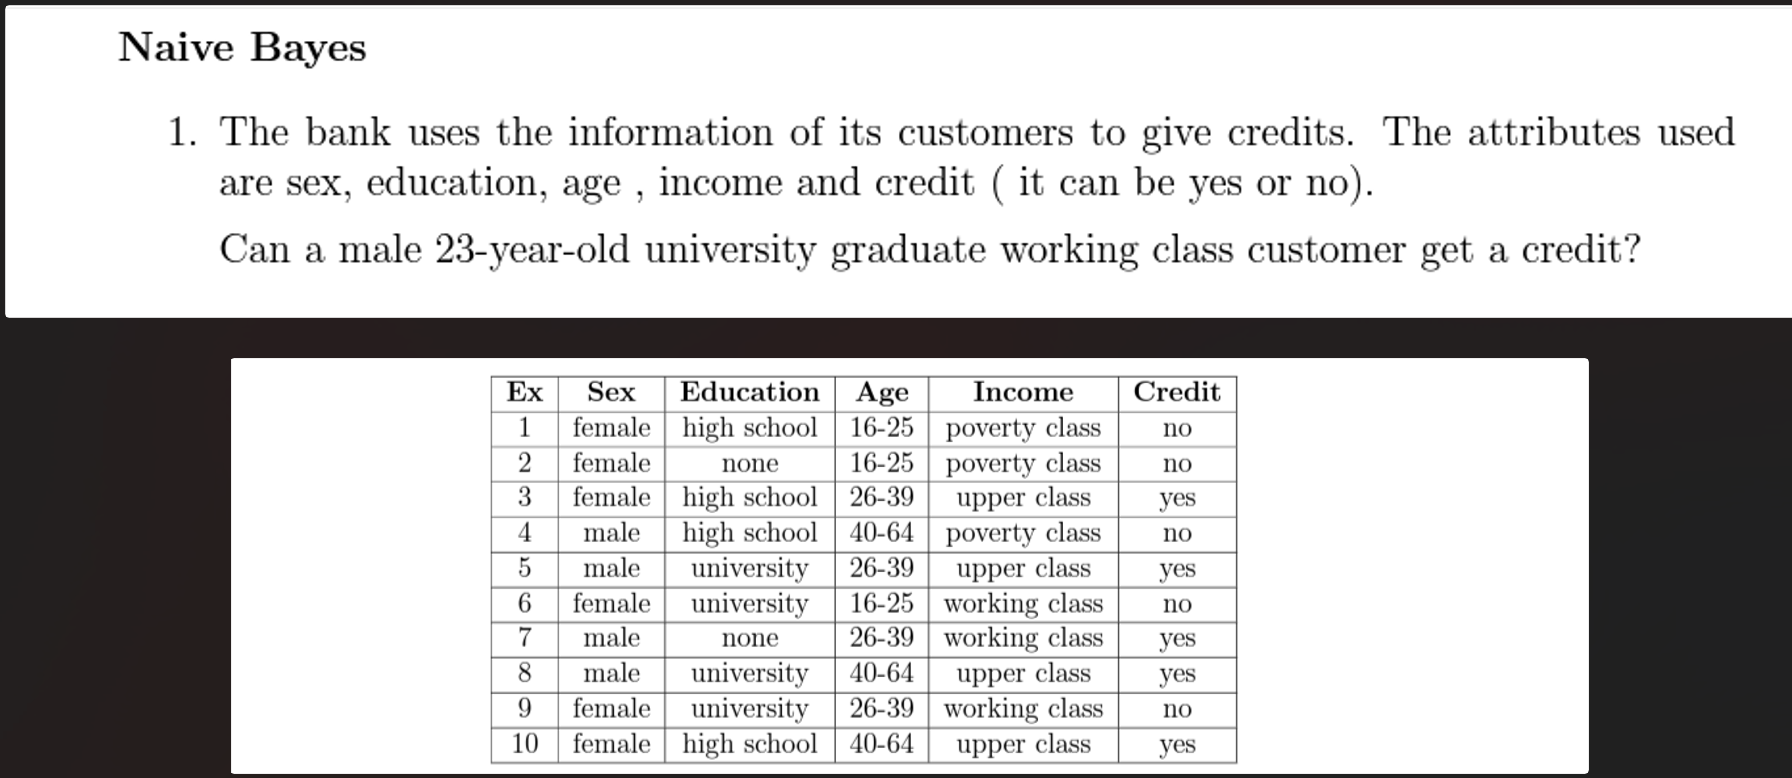

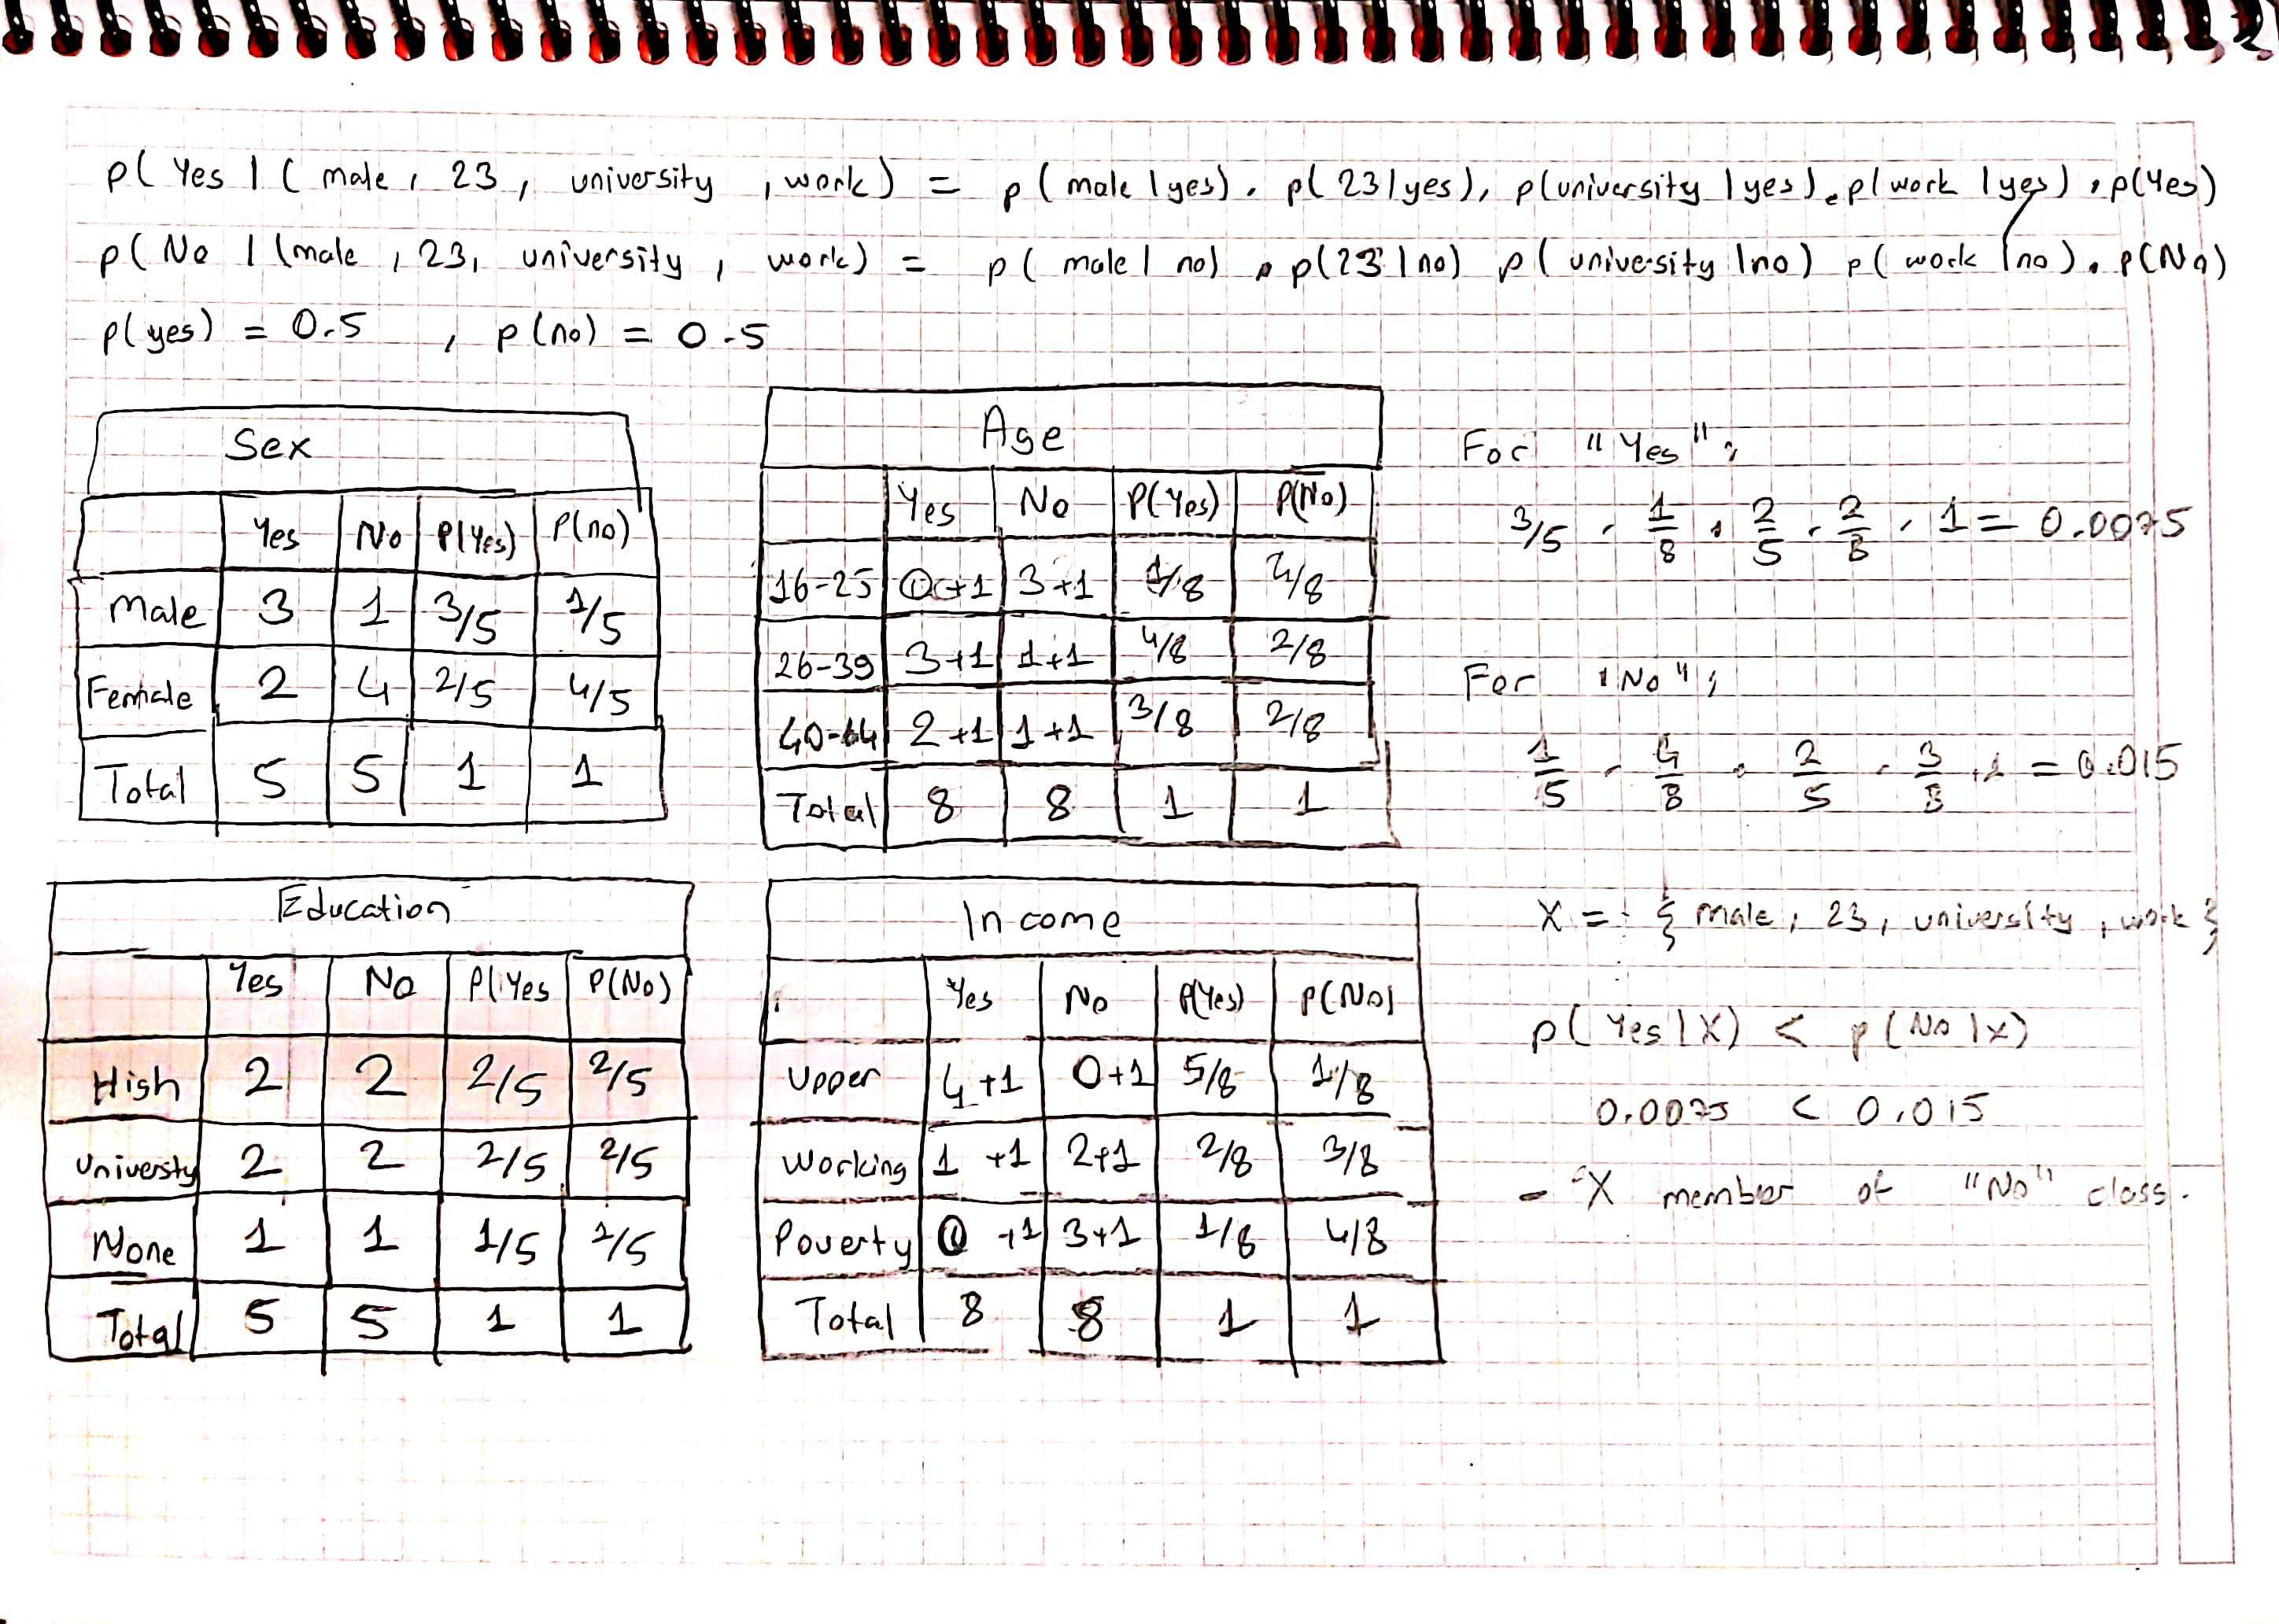

## Part II: Book Genre Classification with Naive Bayes


###Read data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True) 
import pandas as pd
import numpy as np

Mounted at /content/gdrive/


In [ ]:
import os 
os.getcwd()

'/content'

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/AIN311_ass2/book_dataset_a2.csv",sep="\t")

In [ ]:
df

,title,author,description,coverImg,genre
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,Fantasy
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult
...,...,...,...,...,...
21074,Elemental,Kim Richardson (Goodreads Author),When seventeen-year-old Kara Nightingale is su...,https://i.gr-assets.com/images/S/compressed.ph...,Fantasy
21075,Unbelievable,Sherry Gammon (Goodreads Author),Lilah Lopez Dreser's in town to take care of u...,https://i.gr-assets.com/images/S/compressed.ph...,Romance
21076,Anasazi,Emma Michaels,"'Anasazi', sequel to 'The Thirteenth Chime' by...",https://i.gr-assets.com/images/S/compressed.ph...,Mystery
21077,Marked,Kim Richardson (Goodreads Author),--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,https://i.gr-assets.com/images/S/compressed.ph...,Fantasy


In [ ]:
X=df["description"].copy()
y=df["genre"]

In [ ]:
y.unique()

array(['Young Adult', 'Fantasy', 'Classics', 'Science Fiction', 'Fiction',
       'Horror', 'Romance', 'Mystery', 'History', 'Thriller'],
      dtype=object)

In [ ]:
X[1]

'There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all.'

###Preprocess

####Basic Preprocess

In [ ]:
X=df["description"].copy()
y=df["genre"]

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.4 MB/s 
     |████████████████████████████████| 106 kB 34.4 MB/s 


In [ ]:
import re
def preprocess(input_data):
    input_data=input_data.lower()
    remove = re.sub(r'[^\w\s]',' ', input_data)
    return remove

In [ ]:
import contractions
for i in range(len(X)):
  X[i]=contractions.fix(X[i])
  X[i]=' '.join(X[i].splitlines())
  X[i]=''.join(i for i in X[i] if not i.isdigit())
  X[i]=preprocess(X[i])

####Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
def clean_stop_words(data):
  X_=[]
  stop_word = set(stopwords.words('english'))
  for i in range(len(data)):
    words =[w for w in data[i].split() if not w in stop_word]
    words = [word for word in words if len(word)>1]
    X_.append(" ".join(words))
  return  pd.Series(X_)

In [ ]:
X=clean_stop_words(X)

####Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=10)

In [ ]:
X_train

10824    freaks bullies classes crushes high school sta...
51       winner bookbrowse award popular book atmospher...
3556     london gordon comstock declared war money god ...
14417    michener america best writer pittsburgh pressi...
5526     wynter returns five year exile bleak northland...
                               ...                        
9372     every time made choice significant consequence...
7291     alternate cover editionmadly average nearly ei...
17728    adrienne haus survivor mother daughter book cl...
7293     sky phoenix crystal belong mysterious dangerou...
17673    every cherub agent comes somewhere dante scott...
Length: 16863, dtype: object

In [ ]:
X_train=X_train.set_axis([i for i in range(len(X_train))])
X_test=X_test.set_axis([i for i in range(len(X_test))])
y_train=y_train.set_axis([i for i in range(len(y_train))])
y_test=y_test.set_axis([i for i in range(len(y_test))])

In [ ]:
X_train

0        freaks bullies classes crushes high school sta...
1        winner bookbrowse award popular book atmospher...
2        london gordon comstock declared war money god ...
3        michener america best writer pittsburgh pressi...
4        wynter returns five year exile bleak northland...
                               ...                        
16858    every time made choice significant consequence...
16859    alternate cover editionmadly average nearly ei...
16860    adrienne haus survivor mother daughter book cl...
16861    sky phoenix crystal belong mysterious dangerou...
16862    every cherub agent comes somewhere dante scott...
Length: 16863, dtype: object

###Implementing Naive Bayes

####Compute Freaquency

In [ ]:
p_value=y_train.value_counts(normalize=True)
p_value

Fiction            0.228133
Fantasy            0.226828
Young Adult        0.137164
Romance            0.132064
Mystery            0.084445
Science Fiction    0.059064
Classics           0.041214
History            0.035225
Horror             0.035047
Thriller           0.020815
Name: genre, dtype: float64

The unequal class distribution in the data set affects the result.

In [ ]:
def bow_unigram(data_x,data_y):
  word_frequency=dict()
  for i in range(len(data_x)):
    if data_y[i] not in word_frequency:
      keys=data_x[i].split()
      frequency=dict.fromkeys(keys,0)
      for j in keys:
          frequency[j]+=1
      word_frequency[data_y[i]]=frequency
    else:
        for j in data_x[i].split(): 
          if j not in word_frequency[data_y[i]]:
            word_frequency[data_y[i]][j]=1
          else :
            word_frequency[data_y[i]][j]+=1
  return word_frequency

In [ ]:
def bow_bigram(data_x,data_y):
  word_frequency=dict()
  for i in range(len(data_x)-1):
    b=data_x[i].split()
    c=[b[k]+" "+b[k+1] for k in range(len(b)-1)]
    if data_y[i] not in word_frequency:
      frequency=dict.fromkeys(c,0)
      for j in c:
          frequency[j]+=1
      word_frequency[data_y[i]]=frequency
    else:
        for j in c: 
          if j not in word_frequency[data_y[i]]:
            word_frequency[data_y[i]][j]=1
          else :
            word_frequency[data_y[i]][j]+=1
  return word_frequency


In [ ]:
def computeIDF(documents):
    import math
    N = len(documents)
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
          if word in idfDict.keys():
            if val > 0:
                idfDict[word] += 1
          else:
            if val > 0:
                idfDict[word] = 1
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
      if(val * idfs[word] !=0):
          tfidf[word] = val * idfs[word]
    return tfidf


In [ ]:
bow_unigram_data=bow_unigram(X_train,y_train)

In [ ]:
tfa=dict.fromkeys(bow_unigram_data.keys(), 0)
for i in bow_unigram_data.keys():
  tfa[i] = computeTF(bow_unigram_data[i], list(i))

In [ ]:
idfs = computeIDF([bow_unigram_data[i] for i in bow_unigram_data.keys()])

In [ ]:
bow_tfidf_data=dict.fromkeys(bow_unigram_data.keys(), 0)
for i in bow_unigram_data.keys():
  bow_tfidf_data[i] = computeTFIDF(tfa[i], idfs)

In [ ]:
bow_bigram_data=bow_bigram(X_train,y_train)

In [ ]:
for i in range(len(bow_unigram_data.keys())):
  bow_unigram_data[list(bow_unigram_data.keys())[i]]={k: v for k, v in sorted(bow_unigram_data[list(bow_unigram_data.keys())[i]].items(), key=lambda item: item[1],reverse=True)}

In [ ]:
bow_unigram_data

{'Young Adult': {'one': 1469,
  'life': 1304,
  'new': 1208,
  'love': 907,
  'school': 842,
  'world': 833,
  'year': 658,
  'girl': 644,
  'time': 620,
  'like': 617,
  'even': 611,
  'old': 582,
  'family': 570,
  'friends': 569,
  'never': 548,
  'first': 501,
  'best': 493,
  'ever': 493,
  'find': 483,
  'boy': 479,
  'way': 470,
  'cannot': 466,
  'would': 461,
  'back': 460,
  'friend': 455,
  'could': 449,
  'everything': 446,
  'get': 445,
  'secret': 438,
  'must': 431,
  'two': 429,
  'mother': 410,
  'high': 407,
  'knows': 407,
  'story': 383,
  'make': 375,
  'father': 370,
  'know': 359,
  'things': 351,
  'book': 342,
  'wants': 341,
  'people': 337,
  'day': 328,
  'help': 315,
  'series': 314,
  'lives': 313,
  'finds': 308,
  'something': 307,
  'years': 304,
  'parents': 300,
  'secrets': 299,
  'together': 296,
  'novel': 293,
  'past': 292,
  'home': 289,
  'death': 288,
  'girls': 286,
  'heart': 284,
  'dead': 278,
  'everyone': 276,
  'dark': 273,
  'york': 27

In [ ]:
for i in range(len(bow_bigram_data.keys())):
  bow_bigram_data[list(bow_bigram_data.keys())[i]]={k: v for k, v in sorted(bow_bigram_data[list(bow_bigram_data.keys())[i]].items(), key=lambda item: item[1],reverse=True)}

In [ ]:
bow_bigram_data

{'Young Adult': {'year old': 384,
  'best friend': 273,
  'new york': 267,
  'high school': 266,
  'york times': 156,
  'times bestselling': 127,
  'sixteen year': 108,
  'bestselling author': 98,
  'one thing': 84,
  'first time': 76,
  'seventeen year': 75,
  'york city': 71,
  'best friends': 66,
  'small town': 58,
  'years ago': 56,
  'find way': 55,
  'falling love': 55,
  'senior year': 54,
  'one day': 52,
  'award winning': 49,
  'boarding school': 49,
  'young adult': 47,
  'fifteen year': 47,
  'new friends': 45,
  'even though': 45,
  'true love': 44,
  'new life': 40,
  'ever since': 38,
  'fall love': 38,
  'new school': 37,
  'coming age': 36,
  'first love': 36,
  'left behind': 33,
  'pretty little': 32,
  'seems like': 31,
  'next door': 31,
  'older brother': 31,
  'one person': 30,
  'let go': 30,
  'three years': 30,
  'normal life': 30,
  'two years': 29,
  'cannot stop': 29,
  'must decide': 29,
  'one night': 29,
  'little liars': 29,
  'feels like': 28,
  'love

In [ ]:
for i in range(len(bow_tfidf_data.keys())):
  bow_tfidf_data[list(bow_tfidf_data.keys())[i]]={k: v for k, v in sorted(bow_tfidf_data[list(bow_bigram_data.keys())[i]].items(), key=lambda item: item[1],reverse=True)}

In [ ]:
bow_tfidf_data

{'Young Adult': {'billings': 9.001014454431271,
  'suze': 5.442473856167745,
  'boyfriend': 5.3148736767566325,
  'massie': 4.8158912173037445,
  'camelia': 4.395844268443179,
  'clique': 4.389376124820273,
  'lissa': 4.0497267054599675,
  'damen': 3.6578134373502285,
  'cheerleading': 3.558540598263525,
  'kristina': 3.558540598263525,
  'pattyn': 3.3492146807186125,
  'cyd': 3.3492146807186125,
  'strigoi': 3.0725632873741917,
  'kylie': 3.0725632873741917,
  'waverly': 2.9552059742545707,
  'lorien': 2.9305628456287858,
  'electroclan': 2.9305628456287858,
  'airel': 2.9305628456287858,
  'varen': 2.9305628456287858,
  'saba': 2.9305628456287858,
  'maryah': 2.9305628456287858,
  'dimitri': 2.779938212386173,
  'katniss': 2.7212369280838726,
  'virals': 2.7212369280838726,
  'elgen': 2.7212369280838726,
  'kaylee': 2.6336256748921643,
  'dad': 2.535722174025111,
  'aelyx': 2.511911010538959,
  'caitlin': 2.4989747232931503,
  'stacey': 2.487313137398155,
  'lena': 2.4575218219852606

####Naive Bayes Algorithm

In [ ]:
all_data_unigram=dict()
for i in bow_unigram_data.keys():
  for j in bow_unigram_data[i]:
    if j in all_data_unigram.keys():
      all_data_unigram[j]+=bow_unigram_data[i][j]
    else:
      all_data_unigram[j]=bow_unigram_data[i][j]


In [ ]:
all_data_bigram=dict()
for i in bow_bigram_data.keys():
  for j in bow_bigram_data[i]:
    if j in all_data_bigram.keys():
      all_data_bigram[j]+=bow_bigram_data[i][j]
    else:
      all_data_bigram[j]=bow_bigram_data[i][j]

In [ ]:
def compute_test_freq_unigram(test_data):
  X_test_freq=[]
  for i in X_test:
    words_frequency_test=dict()
    for j in i.split():
      if j not in words_frequency_test:
        words_frequency_test[j]=1
      else:
        words_frequency_test[j]+=1
    X_test_freq.append(words_frequency_test)
  return X_test_freq

In [ ]:
def compute_test_freq_bigram(test_data):
  X_test_freq=[]
  for i in X_test:
    words_frequency_test=dict()
    b=i.split()
    c=[b[i]+" "+b[i+1] for i in range(len(b)-1)]
    for j in c:
      if j not in words_frequency_test:
        words_frequency_test[j]=1
      else:
        words_frequency_test[j]+=1
    X_test_freq.append(words_frequency_test)
  return X_test_freq

In [ ]:
def compute_bayes(train_freq_data,test_freq_data,p_value,data_all):
  result=dict()
  keys=[""]
  for j in train_freq_data: # Thriller ={ words: count}
    result[j]=0
    result[j]+=np.log10(p_value[j])
    for i in test_freq_data:# test data words
        if i in train_freq_data[j]: # varsa o kelime devam yoksa laplacian
            numerator=train_freq_data[j][i]+1
            denominator=sum(train_freq_data[j].values())+len(data_all)
            result[j]+=np.log10(numerator/denominator)
        else:
          numerator=1
          denominator=sum(train_freq_data[j].values())+len(data_all)
          result[j]+=np.log10(numerator/denominator)
  return max(result, key=result.get)

In [ ]:
X_try_unigram=compute_test_freq_unigram(X_test)

In [ ]:
X_try_bigram=compute_test_freq_bigram(X_test)

In [ ]:
y_pred=[]
for i in range(len(X_try_unigram)):
  y_pred.append(compute_bayes(bow_unigram_data,X_try_unigram[i],p_value,all_data_unigram))
  

In [ ]:
y_pred=[]
for i in range(1000):
  y_pred.append(compute_bayes(bow_bigram_data,X_try_bigram[i],p_value,all_data_bigram))

In [ ]:
y_pred=[]
for i in range(len(X_try_unigram)):
  y_pred.append(compute_bayes(bow_tfidf_data,X_try_unigram[i],p_value,all_data_unigram))

###Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6892789373814042

##REPORT

###General Information

In this assignment, I created a machine learning model that predicts the genre of the book from the book descriptions using the Naive Bayes algorithm.While building the model, I implemented the code for Bag-of-Words and Naive Bayes calculations myself.
I worked with 21079 pieces of data including book description and genre.Since our data is in string format, I did data preprocessing at first, as in most machine learning models.I also used natural language processing techniques in the data preprocessing stage.Clearing numbers, lowering all words, clearing "\n"...

In the second part of the assignment, I implemented the Bow model. Using nested dictionary. Example usage:

{"Science Fiction": { “Joe”:45, “likes”:120....} , {"Horror":{"scared":48...} ....}

After the BoW model, I created a Naive Bayes Classifier model using Laplacian Smoothing.To avoid the computational difficulty caused by the continuous multiplication of small numbers, I extended the operation with log.

result = a * b    ---->        log(result) = log(a) + log(b)

###Analyzing effect of the words on prediction

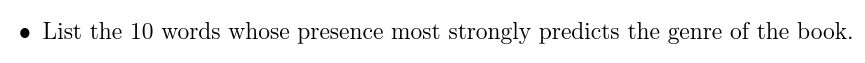

In [ ]:
for i in bow_tfidf_data.keys():
  print(i," : ",end=" ")
  for j in list(bow_tfidf_data[i])[:10]:
      print(j,end=" , ")
  print()

Young Adult  :  billings , suze , boyfriend , massie , camelia , clique , lissa , damen , cheerleading , kristina , 
Fiction  :  jeeves , mitford , ji , narrator , rapp , shiva , bibi , rickey , bertie , langdon , 
Fantasy  :  annja , dragons , faerie , shadowhunters , mage , redwall , pern , shadowhunter , fae , fey , 
Romance  :  mc , sexy , hardin , wedding , alayna , gansett , mackade , thing , lexie , maddie , 
Classics  :  sherlock , trollope , brontë , holmes , ingalls , avait , lettre , dostoevsky , oedipus , macquart , 
Horror  :  lovecraft , cthulhu , lestat , mulvaney , arkeley , vampire , onyx , coffey , cavalier , vours , 
Thriller  :  reacher , robie , sigma , puller , pendergast , cubby , smoky , sas , lowen , schofield , 
Science Fiction  :  asimov , galaxy , heinlein , shortstory , sf , alien , interstellar , nv , ringworld , planet , 
Mystery  :  poirot , brunetti , flavia , hercule , robicheaux , bosch , roarke , gamache , tempe , myron , 
History  :  seuss , mommsen

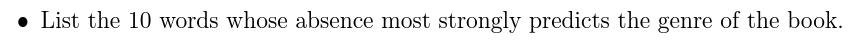

In [ ]:
for i in bow_tfidf_data.keys():
  print(i," : ",end=" ")
  for j in list(bow_tfidf_data[i])[len(list(bow_tfidf_data[i]))-10:len(list(bow_tfidf_data[i]))]:
      print(j,end=" , ")
  print()

Young Adult  :  examine , prehistoric , franklin , researched , heartland , teddy , acquire , perverse , garbage , transcend , 
Fiction  :  tainted , poisoned , doll , helicopter , blunt , stalked , wreak , captors , slaughtered , powerless , 
Fantasy  :  initially , lit , implications , capturing , hail , wreckage , heightened , breakdown , normally , elected , 
Romance  :  gregory , pet , aids , imaginations , superior , authentic , guards , ruling , distinctive , preserve , 
Classics  :  choices , unfamiliar , locate , billy , destroying , tangled , awakens , hugely , hangs , guiding , 
Horror  :  miracles , schemes , faded , coffee , heightened , porter , cabinet , inherited , champion , bars , 
Thriller  :  wandered , politician , recognition , mentally , inherit , phil , premier , comments , pen , lunch , 
Science Fiction  :  shopping , wondering , martha , defiant , majestic , honest , bottle , connecticut , kansas , spiral , 
Mystery  :  forge , eats , herald , aspect , provide

While choosing the words above, I determined them according to the result of tf*idf multiplication. I thought that the highest values ​​express that genres, and the lowest values ​​do not express that genres sufficiently.

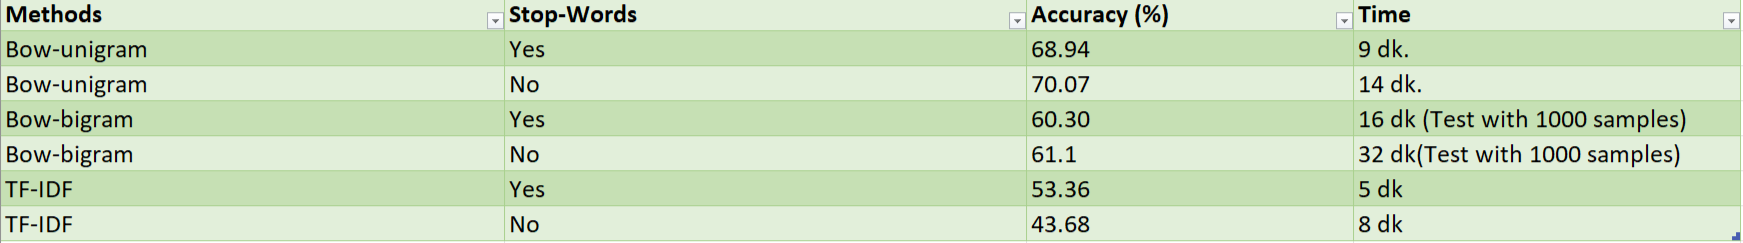

When we consider the above table in general, we see that Bow unigram data gives better results. While doing the homework, my thought was that TF-IDF would work better.

When we consider it as unigram - bigram, we see that unigram data gives better results. I think this is because bigram data has to use Laplacian Smoothing more by calculating Bayesian.

When we consider the use of stop-words, the results are mixed. Although the use of stop word caused some negative results in unigram and bigram data, it provided a 10% increase in accuracy in TF-IDF.
This is because stop words are frequently used in bigram, which increases the probability of being common in binary word matching.
For example;
"novel of a childhood book "
bigram without stop-words ---> "novel of ","of childhood"....
bigram with stop-words --->"novel childhold","childhold book"
Because there is more use of stopwords like "of" in test file
It is more likely to catch "of childhood" than "novel childhold".
Therefore, the use of stop-word may have reduced the accuracy value on bigram data.